# Data Science and Business Analytics

# TASK 2: Prediction using Unsupervised ML

The Sparks Foundation


AUTHOR: GANESH KAILAS YEVLE

BATCH: GRIPJULY2022

For this task we will use the 'Iris' dataset and predict the optimum number of clusters and represent it visually.

Steps to be performed:
    

# Importing all the necessary libraries:
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# LOADING THE DATASET

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### Converting dataset into readable form i.e rows and columns using dataframe function

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print("Data imported successfully")
#print the first few rows
df.head(10)

Data imported successfully


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
#Shape of the dataset
df.shape

(150, 4)

In [6]:
#Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
#Datatypes
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [8]:
#Attributes
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


# PREPROCESSING THE DATASET

In [11]:
#Checking for duplicated values
df.duplicated().sum()

1

In [12]:
#Checking for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# EXPLORATORY DATA ANALYSIS

**Data Visualization**

<AxesSubplot:>

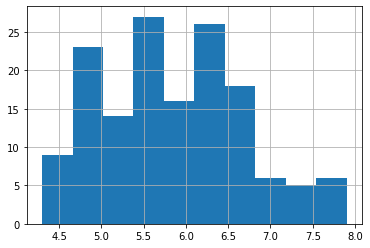

In [13]:
df['sepal length (cm)'].hist()

<AxesSubplot:>

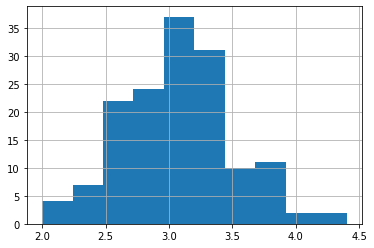

In [14]:
df['sepal width (cm)'].hist()

<AxesSubplot:>

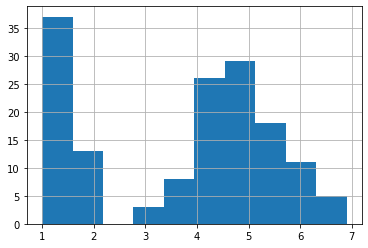

In [15]:
df['petal length (cm)'].hist()

<AxesSubplot:>

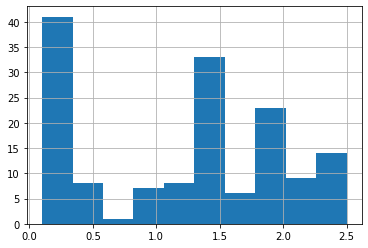

In [16]:
df['petal width (cm)'].hist()


In [17]:
x = dataset.data
y = dataset. target

Finding the optimum number of clusters for Kmeans using 'The elbow method'

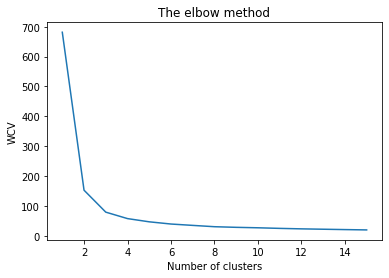

In [18]:
from sklearn.cluster import KMeans
#Experimenting with some values of 'K' to deduce the optima value
wcv = [] # within cluster variation which helps to find the optimum no. of clusters
for i in range(1, 16):
    km = KMeans(n_clusters = i)
    km.fit(x)
    wcv.append(km.inertia_)#calculates wcv
    
#Now plotting a graph which shows us the 'elbow' i.e. apoint afterthe graph changes from exponential to linear

plt.plot(range(1, 16), wcv)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCV')#within cluster variation also known as within cluster sum of squares
plt.show()

As we can , the optimal value of k is between 2 and 4, as the elbow like shape is formed at k = 3 in the graph displayed above.


In [19]:
#Now we apply kmeans to the dataset (kmeans3)
km = KMeans(n_clusters = 3) 
y_pred = km.fit_predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [20]:
df['clusters']=y_pred
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# VISUALIZING CLUSTERING

Visualizing the three clusters with a different color formed with the optimal k value

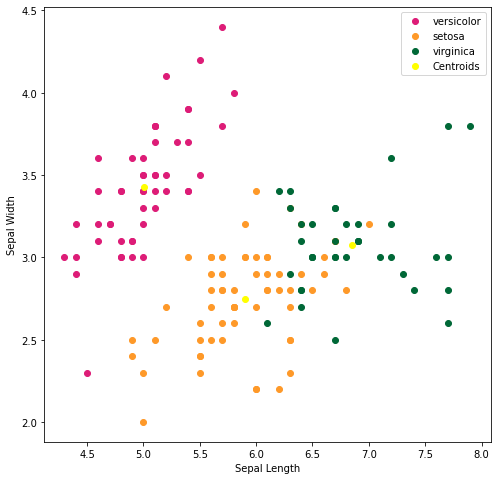

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(x[y_pred == 0, 0],x[y_pred== 0, 1], c = '#dd1c77', label='versicolor')
plt.scatter(x[y_pred == 1, 0],x[y_pred== 1, 1], c = '#fe9929', label='setosa')
plt.scatter(x[y_pred == 2, 0],x[y_pred== 2, 1], c = '#006837', label='virginica')

#Plotting the centroids of the clusters.

plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', label = 'Centroids')
plt.legend(loc='upper right')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()



### Visualizing the clusters of petal length and width

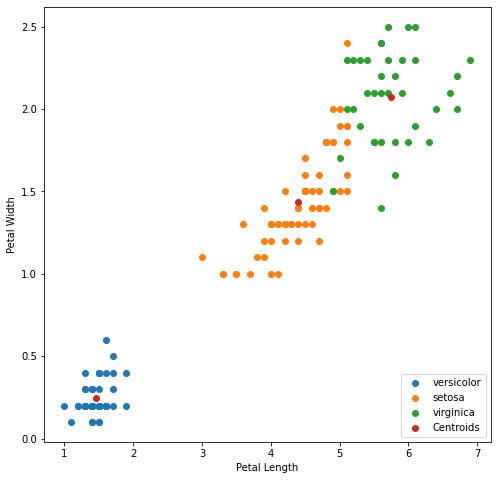

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(x[y_pred ==0,2], x[y_pred ==0,3], label = 'versicolor')
plt.scatter(x[y_pred ==1,2], x[y_pred ==1,3], label = 'setosa')
plt.scatter(x[y_pred ==2,2], x[y_pred ==2,3], label = 'virginica')

#Plotting the Centroids. This time we are going to use the cluster centres

plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3], label = 'Centroids')
plt.legend(loc='lower right')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

## Conclusion

#### Conclusion:We are able to predict the optimum number of clusteri.e.3 and also visualize them with the help of scatter plot.